In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage      
import sklearn.feature_extraction.text as sk_text
import sklearn.cluster as sk_cluster
import sklearn.metrics as metrics
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
import datetime
from sklearn import preprocessing


# Remove all retweets first. Remove all users that have less than 20 tweets. Use train_test_split() to split data into training and test sets, where 20 percent of the records go to test set.

In [2]:
df_cols = ['Name', 'ScreenName', 'UserID', 'FollowersCount', 'FriendsCount', 'Location', 'Description', 'CreatedAt', 'StatusID', 'Language', 'Place', 'RetweetCount', 'FavoriteCount','Text']
df = pd.read_table("clinton_trump_tweets.txt",encoding="ISO-8859-1",header=None,names=df_cols)
df_cols = ['User_id', 'Choice']
df1 = pd.read_table("clinton_trump_user_classes.txt",encoding="ISO-8859-1",header=None,names=df_cols)

In [3]:
users20 = df.groupby('UserID')['Text'].count().sort_values(ascending=False)

In [4]:
users20_list = users20[users20<20].index.tolist()

In [5]:
ucheck = pd.Series(df.UserID)
newdf=df.drop(df[ucheck.isin(users20_list)].index)

In [6]:
users20check = newdf.groupby('UserID')['Text'].count().sort_values(ascending=False)

In [7]:
def dropRT(my_list):
    return my_list[0]=="RT "

In [8]:
df.drop(df[df.Text[:].str.split('@').apply(dropRT)].index,inplace=True)

In [9]:
df

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell microarch. Paper proposes mitigations that could prevent BTB-based side https://t.co/DW6vgRAPrv
7,robert2266,robert2266,17101060,845,938,The Universe,The Dark Lord,Fri Oct 28 14:41:06 EEST 2016,791968028191711237,en,NaN,0,0,"Hacked e-mails show Clinton campaigns fears about Sanders | https://t.co/WMyCHuCDIc The Philippine Star (PhilippineStar) October 28, 2"
10,neddyo,neddyo,16818809,1400,379,Long Island and beyond...,"You should be digging it while it's happening - Zappa; I don't know how you do it, man. - Anastasio #minimix #recommNeds #NYCSOTW",Mon Oct 31 08:06:52 EET 2016,792971077836124160,en,NaN,0,1,Hulk smash!
12,Alexandria Taylor,twentythreeofme,163712593,1342,1346,"Portland, Oregon",Activist | Creator | Educator | #FemTube Host | Passion Project: #DisabilitiesOnYT Panels | Want to participate? https://t.co/IYy6JVqmo5,Tue Oct 25 19:41:52 EEST 2016,790956555030061056,en,"PlaceJSONImpl{name='Washington', streetAddress='null', countryCode='US', id='bc3a38d3d5999b4b', country='United States', placeType='admin', url='https://api.twitter.com/1.1/geo/id/bc3a38d3d5999b4b.json', fullName='Washington, USA', boundingBoxType='Polygon', boundingBoxCoordinates=[[Ltwitter4j.GeoLocation;@5ad5215f], geometryType='null', geometryCoordinates=null, containedWithIn=[]}",0,7,"Well, I'm glad you got a good haircut, America's in the toilet. Is this not a conversation @Haylie_Bre and I woul https://t.co/6dVIIKZcgv"
13,Harry Binford,CaptainNormal,2447279666,895,1224,USA,"Proud Christian husband, frequent shooting range attendee, and former law enforcement. Lifetime member of the NRA. Pro-life, Jesus is Lord. America first.",Thu Oct 27 21:44:44 EEST 2016,791712249685676032,en,NaN,0,0,@WayneDupreeShow #climatechange is the democrats' attempt to play God
18,Matthew Carl Barnard,matthewcbarnard,231921777,350,668,"Milwaukee, Wisconsin",Trying to put one foot forward each day towards living my dream. I have thoughts along the way. Enjoy.,Wed Oct 26 04:23:47 EEST 2016,791087900368789504,en,NaN,0,0,OH MY GOD. TEARS. https://t.co/8odjnHZwRK
20,mystikal knight,_Poochivicious,235657662,777,3236,On An Ultra Light Beams,my life is currently a master p sneaker,Fri Oct 28 15:04:44 EEST 2016,791973973106057216,en,NaN,0,0,"no lie, I been waiting for tony's story https://t.co/S5i4ESNilb"
21,Jim Cook,valukind,201499452,1413,620,New York City,"Internet marketer, college grad, Air Force Vet.Capt.,like people, cats, football,fine dining and helping others to achieve.",Fri Oct 28 03:22:20 EEST 2016,791797209335418880,en,NaN,0,0,How a dot-com millionaire became a social media crusader against solar amendment: It was a violation of Googl... https://t.co/ychypPZpKd


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
df_hashtag_agg  = df.groupby('UserID')['Text'].sum()
df_ready_for_sklearn = pd.DataFrame({'User_id':df_hashtag_agg.index, 'Tweets': df_hashtag_agg.values})

In [41]:
vectorizer = sk_text.TfidfVectorizer(max_features = 15000, min_df = 100, stop_words = 'english')

In [13]:
mergedText = pd.merge(df_ready_for_sklearn, df1, on='User_id')

In [14]:
mergedText

User_id  \
0       150          
1       1437         
2       1501         
3       1512         
4       1644         
5       1668         
6       1737         
7       2294         
8       2311         
9       2391         
10      2424         
11      2426         
12      2480         
13      10420        
14      10549        
15      10637        
16      10715        
17      10933        
18      11014        
19      11569        
20      11862        
21      12404        
22      13512        
23      13558        
24      13683        
25      13737        
26      14763        
27      15543        
28      15833        
29      16373        
...       ...        
164776  2521842644   
164777  2521889909   
164778  2521921878   
164779  2521925561   
164780  2521929295   
164781  2521930375   
164782  2521930666   
164783  2521933298   
164784  2521935452   
164785  2521952112   
164786  2521964308   
164787  2521967087   
164788  2521976250   
164789  2521976948   
164790  2522077191   
164791  2522160205   
164792  2522174788   
164793  2522199981   
164794  2522209999   
164795  2522217890   
164796  2522238208   
164797  2522313516   
164798  2522333254   
164799  2522444346   
164800  2522473626   
164801  2522477492   
164802  2522544348   
164803  2522594107   
164804  2522622542   
164805  2522653212   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [42]:
matrix = vectorizer.fit_transform(mergedText.Tweets.values)

In [43]:
tfidf = matrix.toarray()

In [44]:
tfidf=tfidf[0:15000,:]

In [45]:
y = mergedText['Choice'][0:15000]


In [46]:
y.shape

(15000,)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.2, random_state=4)

In [48]:
X_train.shape

(12000, 12488)

In [49]:
X_test.shape

(3000, 12488)

In [50]:
y_train.shape

(12000,)

In [1]:
y_test.shape

NameError: name 'y_test' is not defined

# Task 1.3 (20 pts): Train k-NN model.

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)



### Apply 5-fold cross validation and Perform parameter tuning on k-NN model.

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, tfidf, y, cv=5, scoring='f1_weighted')

In [68]:
k_range = list(range(10, 35)) #have to figure out what k_range is
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, tfidf, y, cv=5, scoring='f1_weighted')
    k_scores.append(scores.mean())
print(k_scores)

[0.5661754803699836, 0.5750434809658116, 0.5660655324251207, 0.5782396575104105, 0.575539354999012, 0.576800241985366, 0.5717849426026238, 0.5715608552138299, 0.571523558198646, 0.5780523260495312, 0.5727336059304262, 0.5751193038207691, 0.5762384264726047, 0.57799395945016, 0.574338949788958, 0.5753313467608953, 0.5751437983513177, 0.5767452214038709, 0.5731510159264965, 0.5734937283961814, 0.5731031531930564, 0.5718560857824464, 0.5676338405958893, 0.5701542388491667, 0.5702243721863235, 0.5688265384021318, 0.5674752368740318, 0.574226421867422, 0.5701440272100957, 0.5717459359878669]


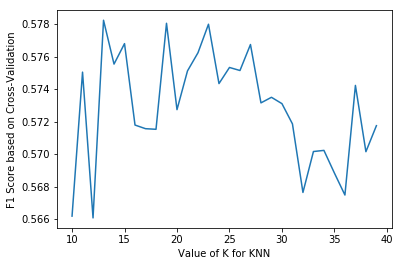

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 Score based on Cross-Validation')
plt.show()

## Apply 5-fold cross validation and use grid search to find the best K value for k-NN model


In [65]:
k_range = list(range(10, 35))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier(n_neighbors=1)

In [66]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')

In [67]:
grid.fit(tfidf, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [70]:
means = grid.cv_results_['mean_test_score']
means

array([0.56617722, 0.57504938, 0.56606984, 0.57823925, 0.57554119,
       0.57680138, 0.57178104, 0.57156117, 0.57151423, 0.57804661,
       0.57272887, 0.57511904, 0.57623573, 0.57798725, 0.57433149,
       0.5753238 , 0.5751356 , 0.57673812, 0.57314093, 0.57348616,
       0.57309653, 0.57185203, 0.56762613, 0.57014904, 0.57021608,
       0.5688192 , 0.56746594, 0.57422027, 0.57013799, 0.57174088])

In [71]:
grid.cv_results_['params']

[{'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20},
 {'n_neighbors': 21},
 {'n_neighbors': 22},
 {'n_neighbors': 23},
 {'n_neighbors': 24},
 {'n_neighbors': 25},
 {'n_neighbors': 26},
 {'n_neighbors': 27},
 {'n_neighbors': 28},
 {'n_neighbors': 29},
 {'n_neighbors': 30},
 {'n_neighbors': 31},
 {'n_neighbors': 32},
 {'n_neighbors': 33},
 {'n_neighbors': 34},
 {'n_neighbors': 35},
 {'n_neighbors': 36},
 {'n_neighbors': 37},
 {'n_neighbors': 38},
 {'n_neighbors': 39}]

In [72]:
for mean, params in zip(means, grid.cv_results_['params']):
    print(mean, params)

0.5661772192253363 {'n_neighbors': 10}
0.5750493797399074 {'n_neighbors': 11}
0.5660698409438152 {'n_neighbors': 12}
0.5782392529283202 {'n_neighbors': 13}
0.5755411931636037 {'n_neighbors': 14}
0.5768013839080711 {'n_neighbors': 15}
0.5717810396700348 {'n_neighbors': 16}
0.5715611673039177 {'n_neighbors': 17}
0.571514234043701 {'n_neighbors': 18}
0.5780466081092188 {'n_neighbors': 19}
0.5727288729266937 {'n_neighbors': 20}
0.575119036139187 {'n_neighbors': 21}
0.5762357344723967 {'n_neighbors': 22}
0.5779872534333206 {'n_neighbors': 23}
0.574331487948496 {'n_neighbors': 24}
0.5753238024962245 {'n_neighbors': 25}
0.57513560315782 {'n_neighbors': 26}
0.5767381177971791 {'n_neighbors': 27}
0.5731409340120859 {'n_neighbors': 28}
0.5734861561817031 {'n_neighbors': 29}
0.5730965333716512 {'n_neighbors': 30}
0.571852029142838 {'n_neighbors': 31}
0.5676261271536946 {'n_neighbors': 32}
0.5701490427808323 {'n_neighbors': 33}
0.5702160837870484 {'n_neighbors': 34}
0.5688192018899184 {'n_neighbor

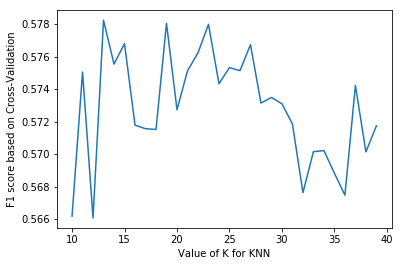

In [73]:
# plot the results
plt.plot(k_range, means)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 score based on Cross-Validation')
plt.show()

In [64]:
# identify the best model

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5782392529283202
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


In [59]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_pred, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_pred, average='weighted'))          # Parameter "average" is requred if not a binary model

[[ 176  523]
 [ 418 1883]]
0.6693117668790985
0.6863333333333334
0.6770959606490211
